In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append("../python/")
from interaction_network import *
%matplotlib inline

(array([16.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([1.31462812e-09, 6.88770291e-02, 1.37754057e-01, 2.06631085e-01,
        2.75508113e-01, 3.44385140e-01, 4.13262168e-01, 4.82139196e-01,
        5.51016224e-01, 6.19893252e-01, 6.88770280e-01]),
 <BarContainer object of 10 artists>)

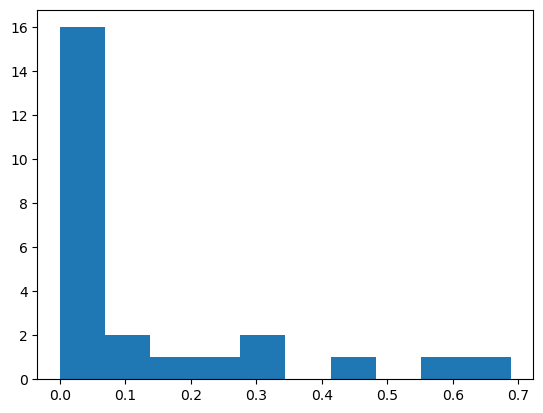

In [2]:
num_species = 25
alpha = 0.25
beta = 1.0
species_mass = get_species_mass(num_species, alpha, beta)
plt.hist(species_mass)

In [11]:
arrival_mu = 0.25
arrival_var = 0.05
interval_mu = 0.125
interval_var = 0.05
intervals = get_intervals(num_species, arrival_mu, arrival_var, interval_mu, interval_var)
overlaps = compute_overlaps(intervals)

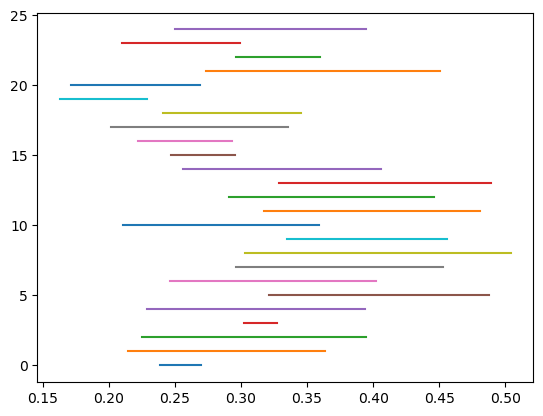

In [12]:
for i in range(intervals.shape[1]):
    plt.plot(intervals[:,i], [i]*2)

In [13]:
C = 0.15
interaction_graph = generate_interactions(species_mass, intervals, C)

In [14]:
nx.transitivity(interaction_graph)

0.41519434628975266

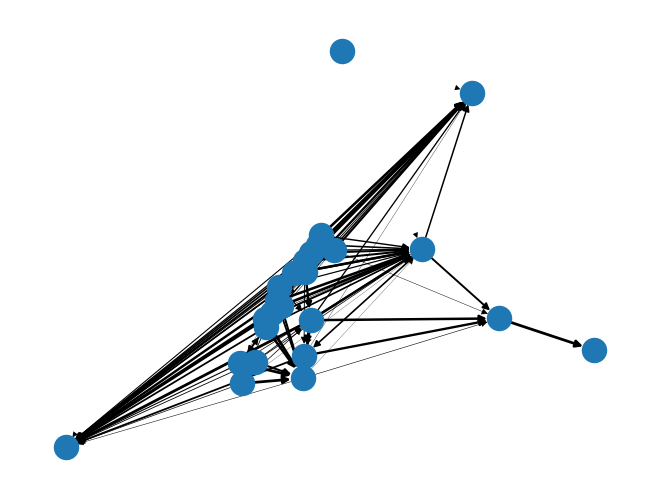

In [15]:
edge_weights = [edat["weight"]*2 for _,_,edat in interaction_graph.edges(data=True)]
nx.draw(interaction_graph, width=edge_weights)